Import Libraries and read in the data

In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\rijul\Downloads\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


--------Data Exploration--------

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


Checking for Missing Values

In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing
for col in df.columns:
        missing_percent= np.mean(df[col].isnull())
        print('{}-{}%'.format(col,round(missing_percent*100))) 

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


Let's check the count of missing values in each column by taking the sum of all null values. Further Sorting the data in descending order

In [7]:
df.isnull().sum().sort_values(ascending = False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

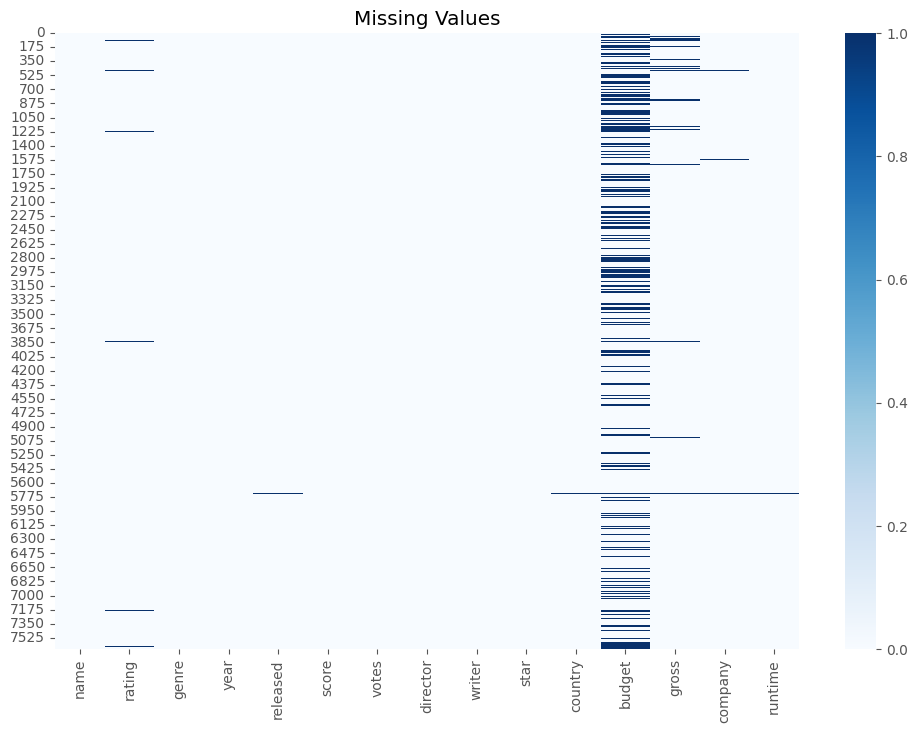

In [8]:
sns.heatmap(df.isna(), cmap="Blues")
plt.title("Missing Values")


Dealing with Duplicates
In this particular case, the most reasonable approach to check for duplicates would be through the name column (since duplicates would be expected for the rest of the columns).

In [10]:
# Looking for movie names with the same name though the data
duplicate = df[df.duplicated('name')]
duplicate.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1360,The Bear,PG,Adventure,1988,"October 27, 1989 (United States)",7.7,17000.0,Jean-Jacques Annaud,James Oliver Curwood,Tchéky Karyo,France,NaN,31753898.0,Price,96.0
1836,Impulse,R,Crime,1990,"April 6, 1990 (United States)",5.7,1200.0,Sondra Locke,John DeMarco,Theresa Russell,United States,9000000.0,2544504.0,Warner Bros.,109.0
2022,Paradise,PG-13,Drama,1991,"October 4, 1991 (United States)",6.7,2700.0,Mary Agnes Donoghue,Mary Agnes Donoghue,Melanie Griffith,United States,NaN,18634643.0,Grand Highway Productions,111.0
2104,Forever Young,PG,Drama,1992,"December 16, 1992 (United States)",6.3,45000.0,Steve Miner,J.J. Abrams,Mel Gibson,United States,NaN,127956187.0,Warner Bros.,102.0
2368,Dream Lover,R,Drama,1993,"May 6, 1994 (United States)",6.2,4500.0,Nicholas Kazan,Nicholas Kazan,James Spader,United States,NaN,256264.0,PolyGram Filmed Entertainment,103.0


In [11]:
#Seems like the duplicates are mostly remakes lets search with the movie name Hercules to confirm this
df.loc[df['name'] == 'Hercules']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
406,Hercules,PG,Adventure,1983,"August 26, 1983 (United States)",4.0,3600.0,Luigi Cozzi,Luigi Cozzi,Lou Ferrigno,Italy,2500000.0,10676194.0,Cannon Films Inc.,98.0
3062,Hercules,G,Animation,1997,"June 27, 1997 (United States)",7.3,212000.0,Ron Clements,Ron Clements,Tate Donovan,United States,85000000.0,252712101.0,Walt Disney Pictures,93.0
6469,Hercules,PG-13,Action,2014,"July 25, 2014 (United States)",6.0,149000.0,Brett Ratner,Ryan J. Condal,Dwayne Johnson,United States,100000000.0,244819862.0,Paramount Pictures,98.0


We can see that the duplicates in this column are actually remakes.Therefore, we will not exclude any.

Findings:
1. Some of the values are missing from few columns like budget and gross.
2. Duplicates checked by name coulmns are just remakes.
3. Year column has a different year mentioned than the one mentioned in the released column in some rows.

Data Cleaning and Transformation

A brief description of what we aim to achieve in this phase:
    -Dropping the missing values in all rows
    -Correct the year column with the year mentioned in the released column
    -adjust the data types of budget, gross and votes to integer
    -drop the released column. Insert the released_date year as the year column.
    -renamed the 'not rated' values in the rating column to simply 'unrated' (which is also a label), to reduce redundancy

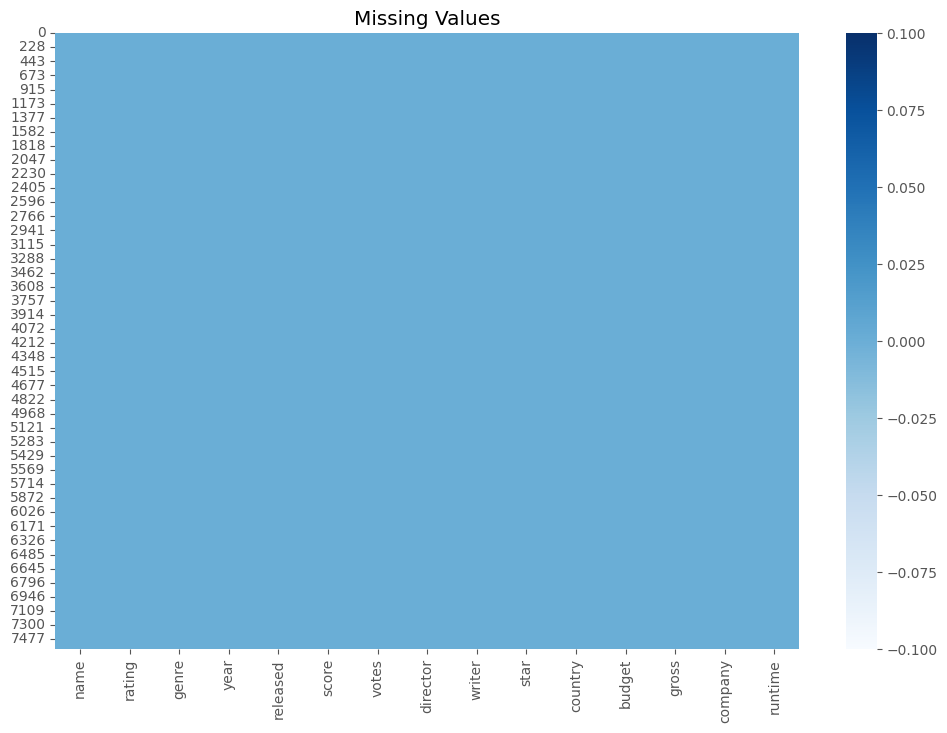

In [12]:
#Dropping all row with null values considering that they represent a small percentage of our dataset
df.dropna(inplace=True)
sns.heatmap(df.isna(), cmap="Blues")
plt.title("Missing Values")
plt.show()

In [13]:
# adjusting data types and transforming columns

df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)
df.votes = df.votes.astype(int)

df['released_date'] = df.released.str.split('(', expand=True)[0]
df['released_date'] = pd.to_datetime(df.released_date)
df['year'] = df.released_date.dt.year
df['released_country'] = df.released.str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')
df = df.drop('released', axis=1)

#renaming the 'not rated' values in the rating column to'unrated'
df['rating'] = df.rating.str.replace('Not Rated', 'Unrated')

C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\4267462934.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released_country'] = df.released.str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')


In [14]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


EDA
let's explore the dataset by plotting charts. We are going to plot the following to have a better understanding of the data we are working with:-
1.Top 10 Companies which have released highest number of movies
2.Top 10 Stars who have acted in highest number of movies
3.Comparing different genres by number
4.Top 5 movies with highest revenues
5.Comparing the top 10 companies on the basis of budget and gross revenue
6.What is the volume of movies coming out per year?

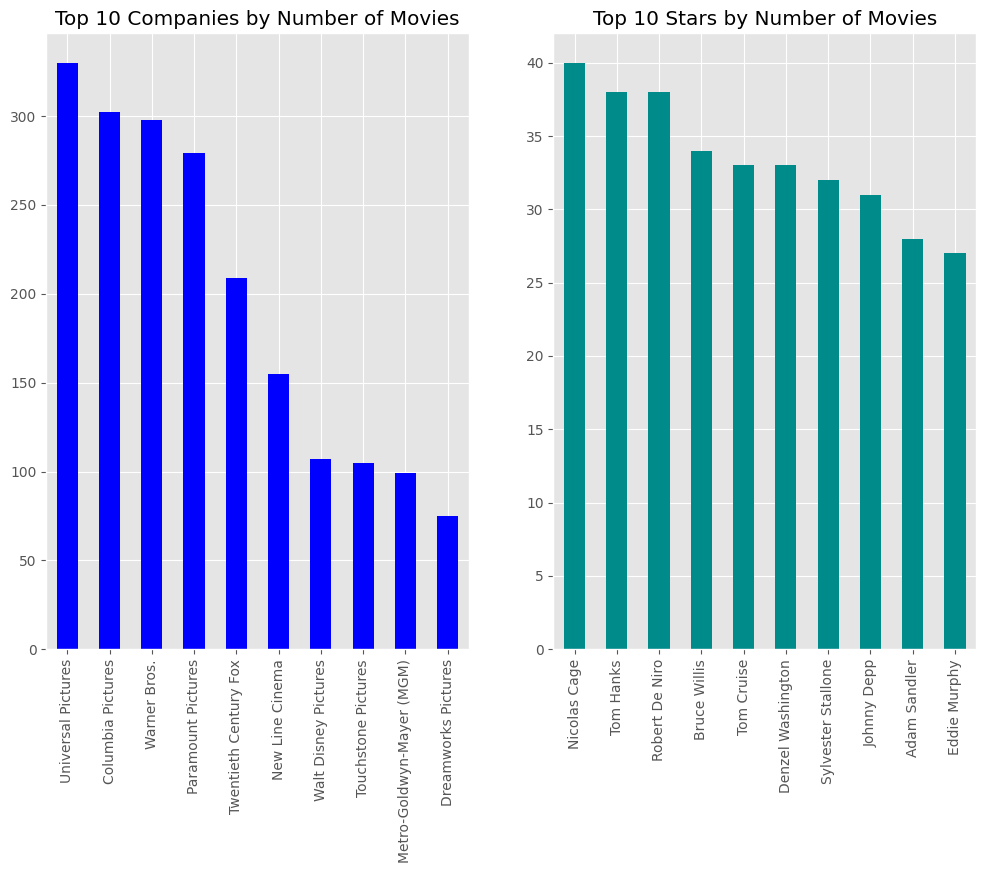

In [15]:
#1 and #2
CompaniesWithMostMovies = df.company.value_counts().head(10)
StarsWithMostMovies =df.star.value_counts().head(10)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
CompaniesWithMostMovies.plot(kind='bar', ax=ax1, color='b', title='Top 10 Companies by Number of Movies');
StarsWithMostMovies.plot(kind='bar', ax=ax2, color='darkcyan', title='Top 10 Stars by Number of Movies');


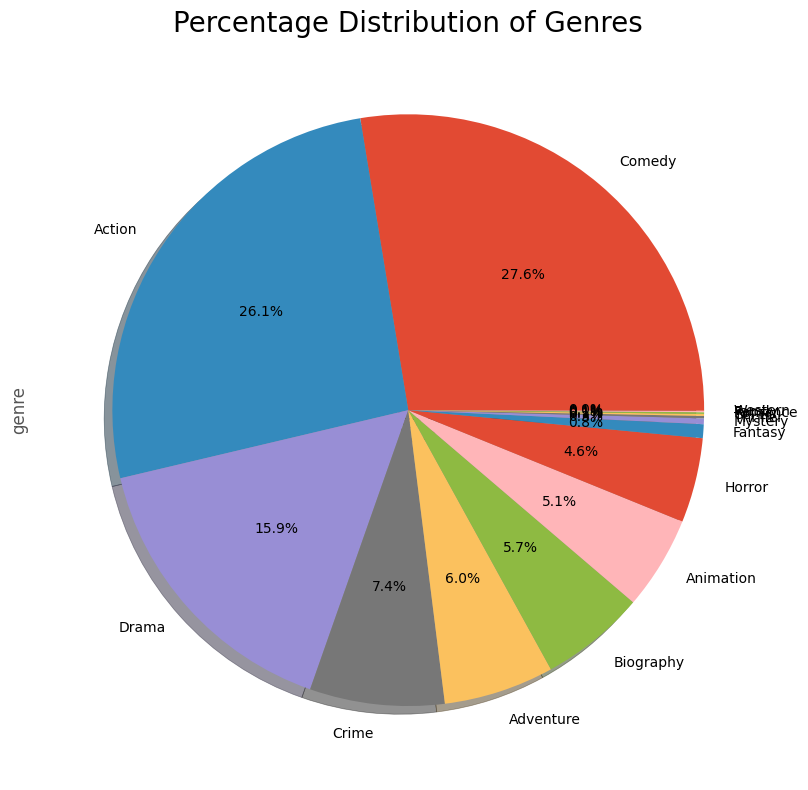

In [16]:
#3
df['genre'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (14,8))
plt.title('Percentage Distribution of Genres', fontsize = 20)
plt.tight_layout()
plt.show()

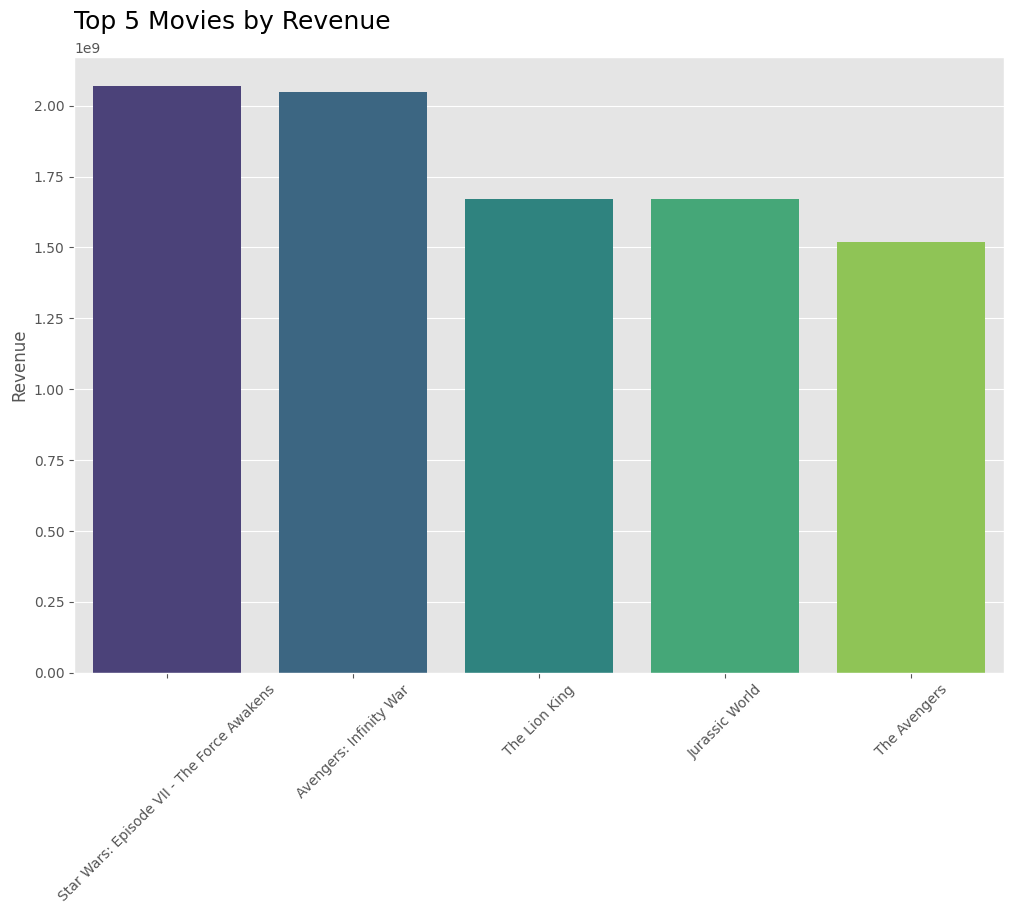

In [19]:
#4
top5MoviesbyRevenue = df.sort_values(by='gross', ascending=False).head(5)
sns.barplot(x='name', y='gross', data=top5MoviesbyRevenue, palette='viridis');
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('Revenue');
plt.title('Top 5 Movies by Revenue', loc='left', fontsize=18, pad=20);

In [20]:
# First we willmake a new dataframe for the company's budget and gross sum and sorting them
company = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
company.head(10) 
# Second we will reset the index and take only the top 10 comapnies
top10companies = company.reset_index()
top10companies = top10companies.head(10)
top10companies

C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\4076217513.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  company = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)


,company,budget,gross
0,Warner Bros.,19503300000,54610959970
1,Universal Pictures,15989730001,51241105418
2,Columbia Pictures,15512107000,42356430218
3,Paramount Pictures,13723450000,40021704691
4,Walt Disney Pictures,10404700000,35833650748
5,Twentieth Century Fox,11474600000,30198712540
6,New Line Cinema,5645200000,19612851164
7,DreamWorks Animation,3344000000,11873612858
8,Dreamworks Pictures,3961700000,11593807697
9,Touchstone Pictures,4153700000,10664679494


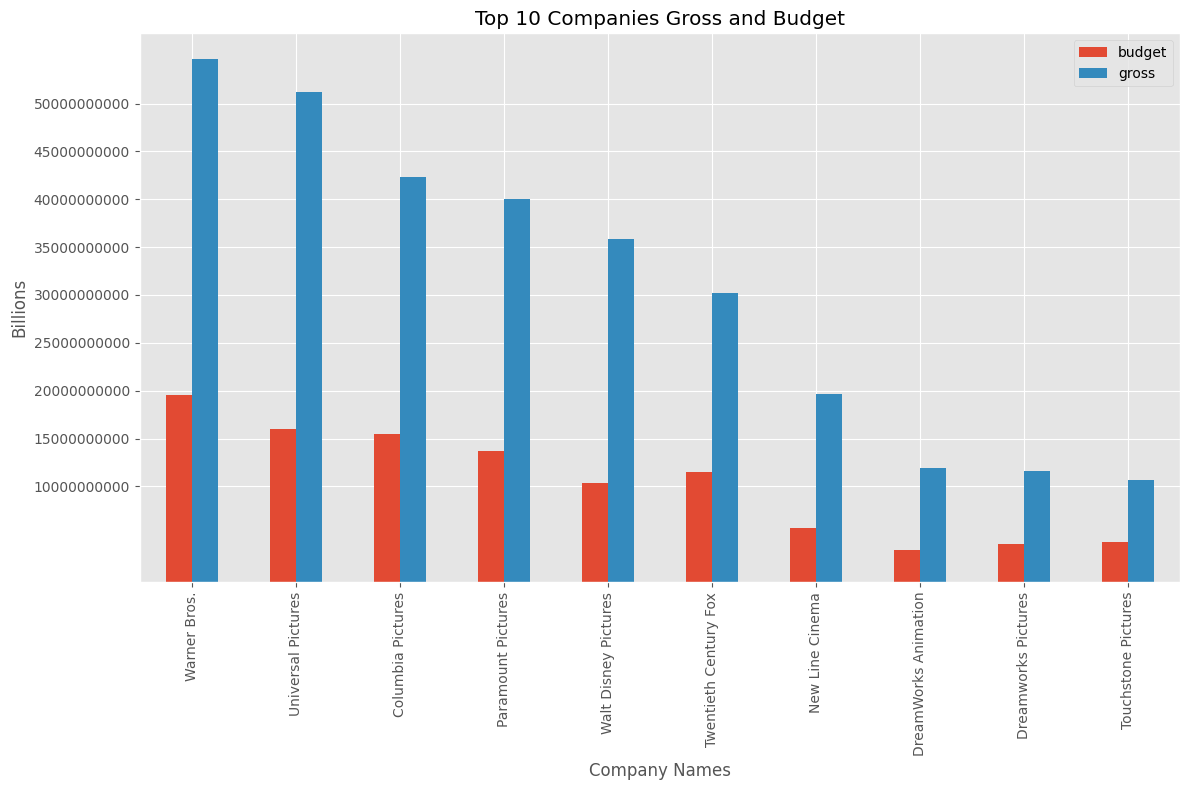

In [22]:
#5
ax = top10companies.plot.bar(x ='company', rot = 0 )

plt.title("Top 10 Companies Gross and Budget")
plt.xlabel("Company Names")
plt.ylabel("Billions")

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], rotation ='vertical')

plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()

ax.set_yticklabels(['{:.0f}'.format(x) for x in vals]) 

plt.tight_layout()
plt.show()

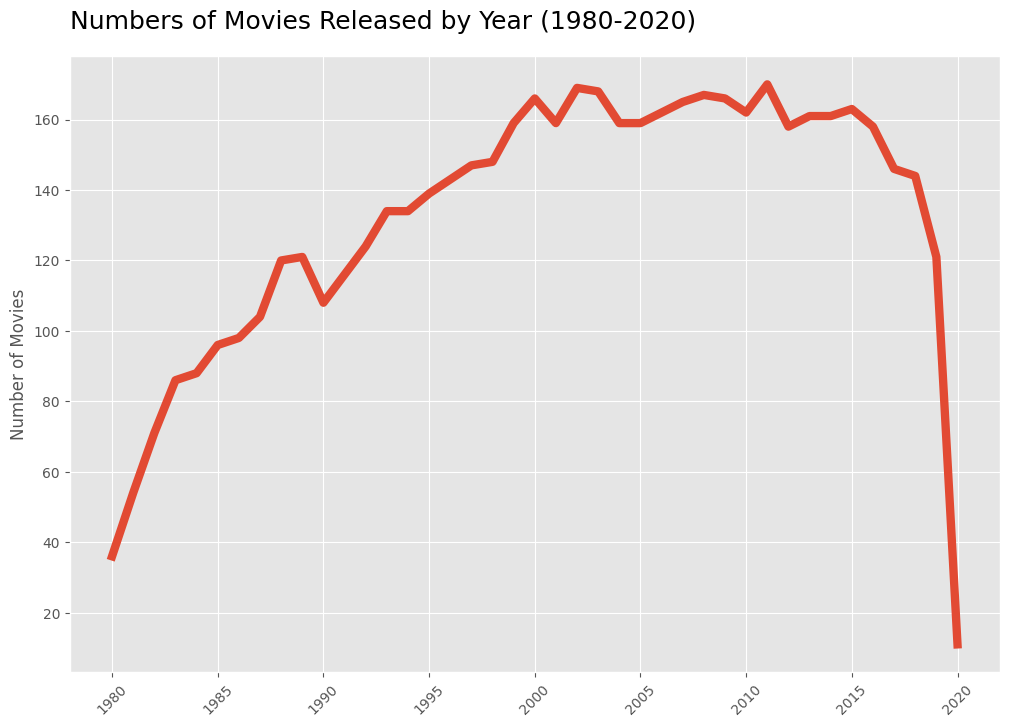

In [23]:
release_year = df.groupby('year').count()
sns.lineplot(x=release_year.index, y='name', data=release_year, linewidth=6);
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('Number of Movies');
plt.title('Numbers of Movies Released by Year (1980-2020)', loc='left', fontsize=18, pad=20);

In 2020 due to the covid-19 pandemic the number of movies released fell sharply as the theatres were closed during that time period.

Finding Correlations

In [24]:
df.corr()

C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.262186,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.201086,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.550649,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.669203,0.318695
gross,0.262186,0.201086,0.550649,0.669203,1.000000,0.223667
runtime,0.075294,0.414068,0.352303,0.318695,0.223667,1.000000


C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\1279345923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


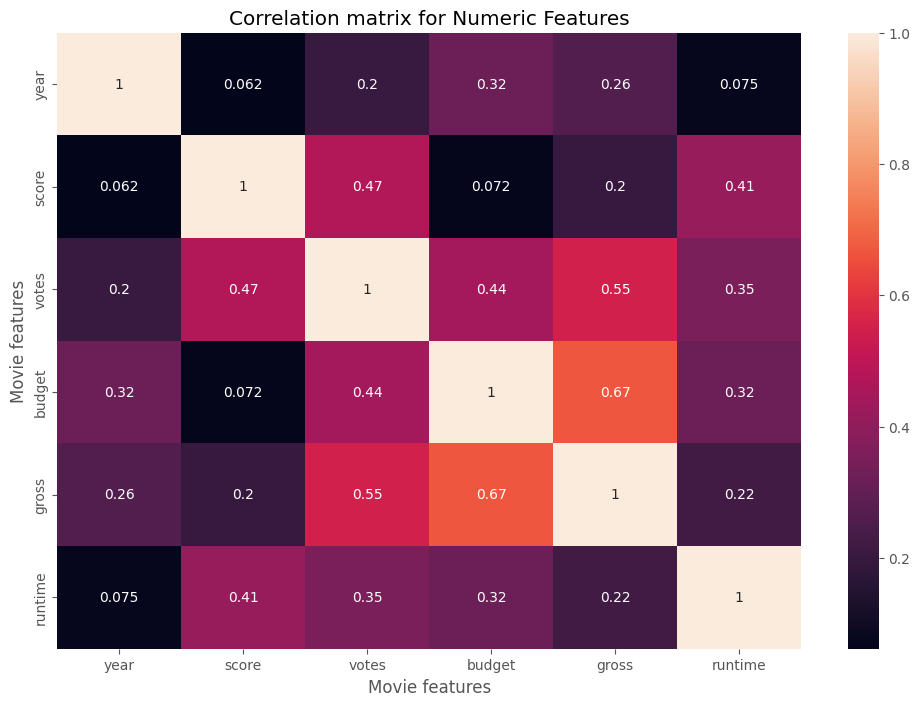

In [25]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

There is a clear correlation between Gross revenue and Budget. Also there is a 
high correlation between votes and Gross 

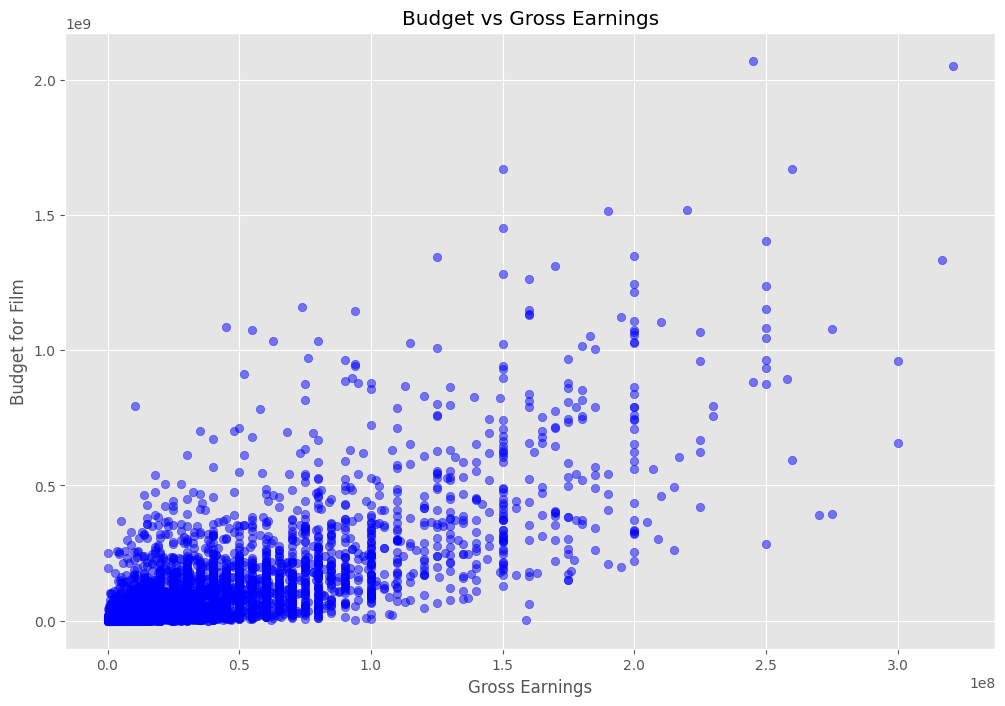

In [37]:
#Let's do a scatter plot for Budget vs Gross Earnings

plt.scatter(x=df['budget'], y=df['gross'],color='b', alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

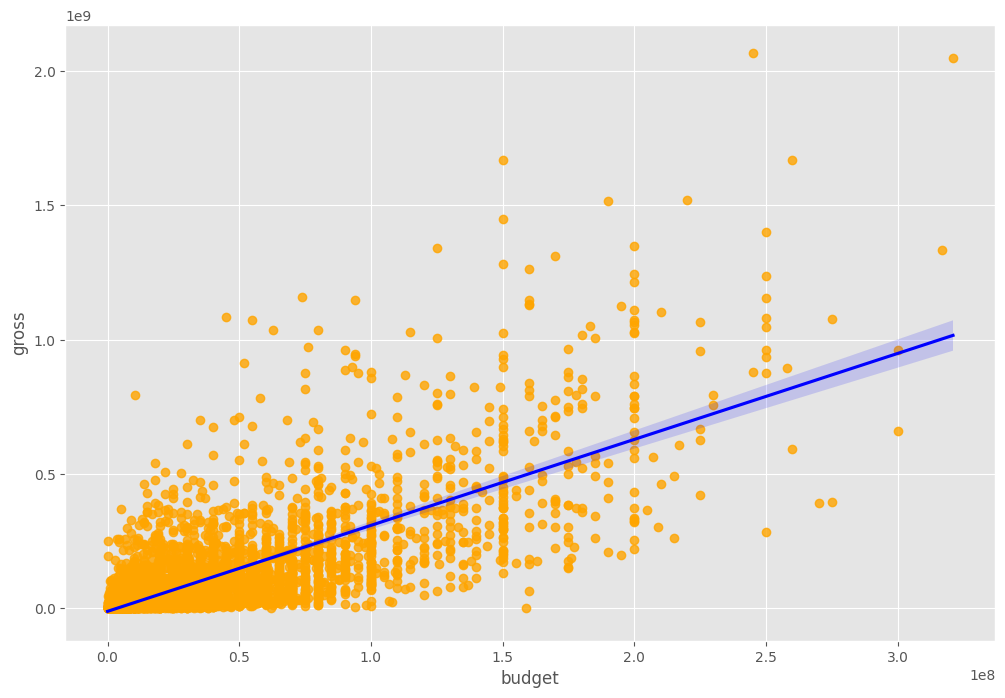

In [38]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"orange"},line_kws={"color":"blue"})

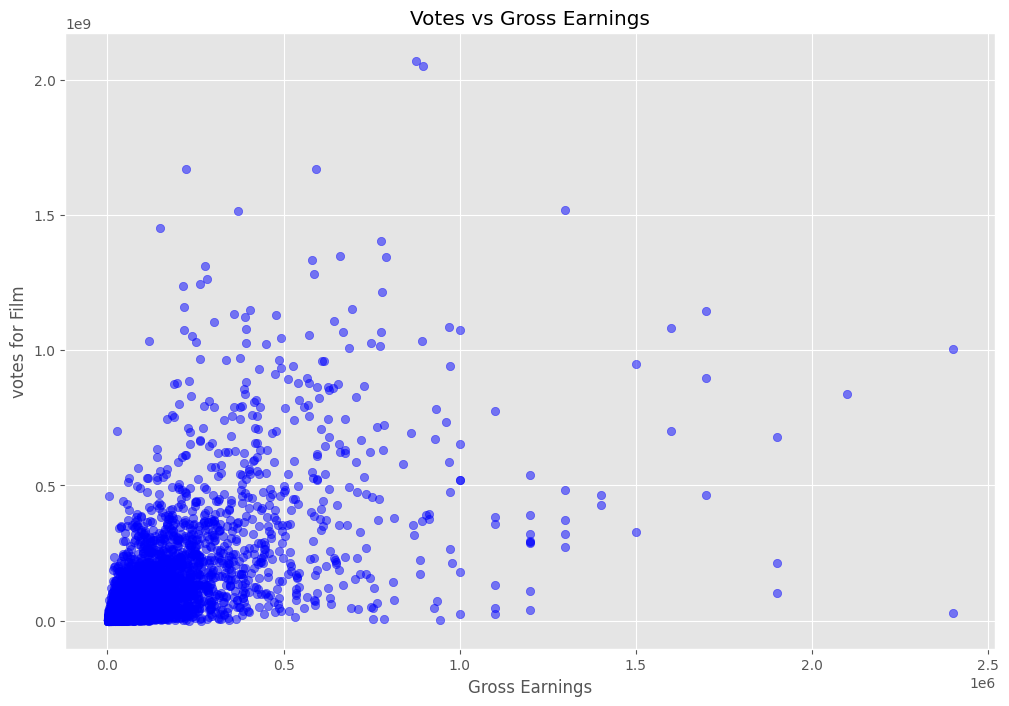

In [39]:
#Let's do a scatter plot for Votes vs Gross Earnings

plt.scatter(x=df['votes'], y=df['gross'],color='b', alpha=0.5)
plt.title('Votes vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('votes for Film')
plt.show()


<AxesSubplot: xlabel='votes', ylabel='gross'>

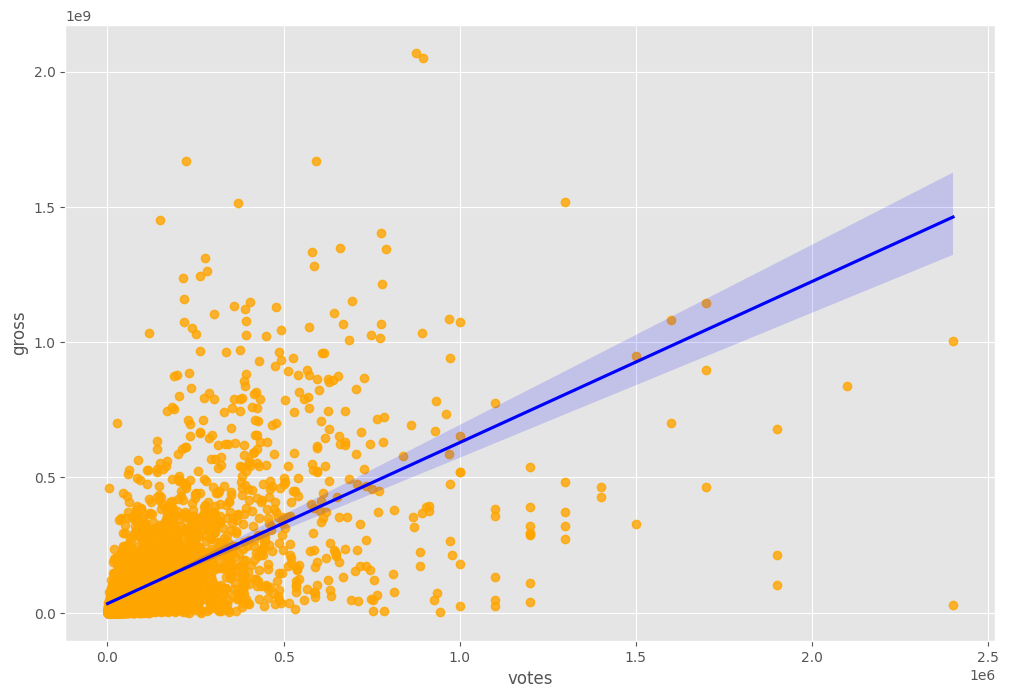

In [40]:
sns.regplot(x='votes',y='gross',data=df,scatter_kws={"color":"orange"},line_kws={"color":"blue"})

In [30]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,4692,5,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980-06-13,47
1,3929,5,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980-07-02,47
2,3641,3,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980-06-20,47
3,204,3,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980-07-02,47
4,732,5,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980-07-25,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,5,0,2020,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020-01-17,47
7649,3556,3,0,2020,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020-02-14,47
7650,1153,3,1,2020,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020-01-17,47
7651,3978,3,1,2020,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020-02-21,47


C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\2789865429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerized.corr()


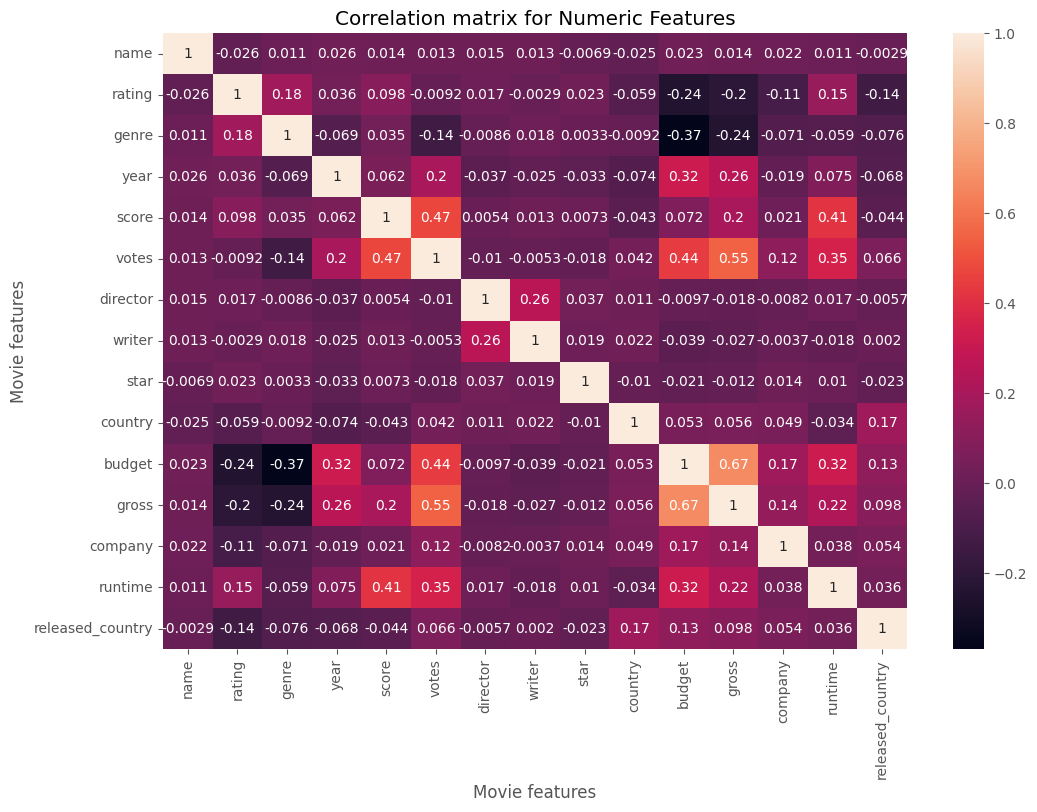

In [31]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [32]:
cormax = df_numerized.corr()
cor_pairs = cormax.unstack()
sorted_pairs = cor_pairs.sort_values()
sorted_pairs

C:\Users\rijul\AppData\Local\Temp\ipykernel_11320\1061665395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormax = df_numerized.corr()


genre             budget             -0.368523
budget            genre              -0.368523
rating            budget             -0.241907
budget            rating             -0.241907
genre             gross              -0.238629
                                        ...   
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
runtime           runtime             1.000000
released_country  released_country    1.000000
Length: 225, dtype: float64

In [33]:
high_correlation=sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) < 1.0)].sort_values(ascending = False)
high_correlation

gross   budget    0.669203
budget  gross     0.669203
votes   gross     0.550649
gross   votes     0.550649
dtype: float64

Conclusion
-Universal Pictures have produced the most number of movies followed by Columbia pictures and Warner Bros. However, Warner Bros has more gross revenue than Universal pictures and Columbia Pictures which shows that they have produced more successful movies.
-Star wars has earned the highest gross revenue amongst all movies.
-Nicolas Cage has acted in highest number of movies followed by Tom Hanks and Robert De Niro.
-Comedy And Action genre has been the most popular genre. More than 50% of the movies released are based on either Comedy or Action genre.
-The graphical representation shows that number of movies produced increased year after year from 1980 till 2019. This shows with time cinema industry became bigger and popular. Only sharp fall came during the crisis of the covid-19 pandemic when the closure of theatres meant very few movies released in the year 2020.
-Features like Company,genre,star and scores do not have a high correlation with gross revenue.
-Features like Votes and Budget do have a high correlation with gross revenue.
